<a href="https://colab.research.google.com/github/NainaniJatinZ/Hack_Inversion-SIH/blob/main/Notebooks/Forecasting/Statistical_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [ ]:
# !pip install -q sktime
!pip install -q pmdarima

     |████████████████████████████████| 1.4 MB 4.6 MB/s 


In [ ]:
from sktime.forecasting.arima import AutoARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
!pip install statsmodels==0.12.2
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# !pip install sktime==0.6.1
# !pip install pmdarima==1.8.2
import lightgbm as lgb
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.compose import (TransformedTargetForecaster,
                                        make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter,
                                                ForecastingGridSearchCV)
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

sns.set()
plt.style.use('bmh')

In [ ]:
import numpy as np
import datetime as dt 
import pandas as pd
import pandas_datareader.data as web
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Data Preprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/nymex_4ind.csv')
data.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low,SMA,EMA,MACD,DateTime,Custom
0,0,2012-03-12,2.269,82299.0,2.272,2.289,2.235,0.0,0.0,0.0,2012-03-12,100.0
1,1,2012-03-13,2.299,114622.0,2.270,2.338,2.207,0.0,0.0,0.0,2012-03-13,100.0
2,2,2012-03-14,2.284,120435.0,2.329,2.343,2.248,0.0,0.0,0.0,2012-03-14,100.0
3,3,2012-03-15,2.279,117788.0,2.275,2.331,2.234,0.0,0.0,0.0,2012-03-15,100.0
4,4,2012-03-16,2.326,112037.0,2.267,2.349,2.247,0.0,0.0,0.0,2012-03-16,100.0


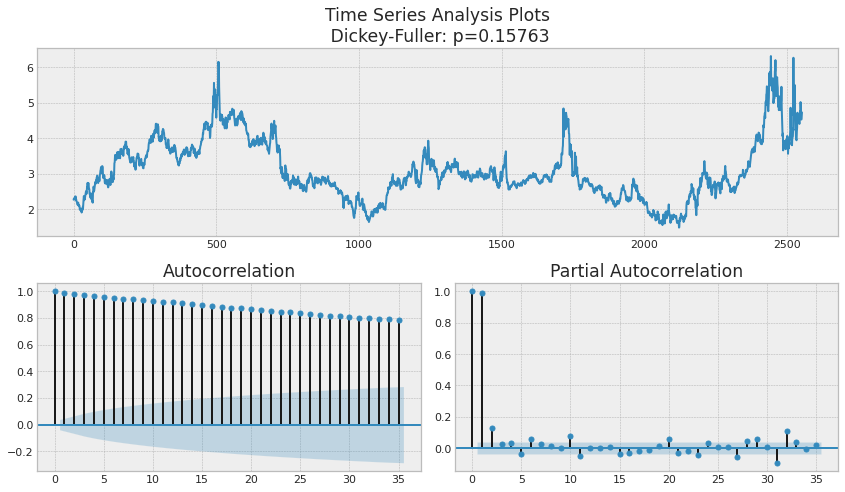

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
           
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
    
close_data = data['Close']
tsplot(close_data)

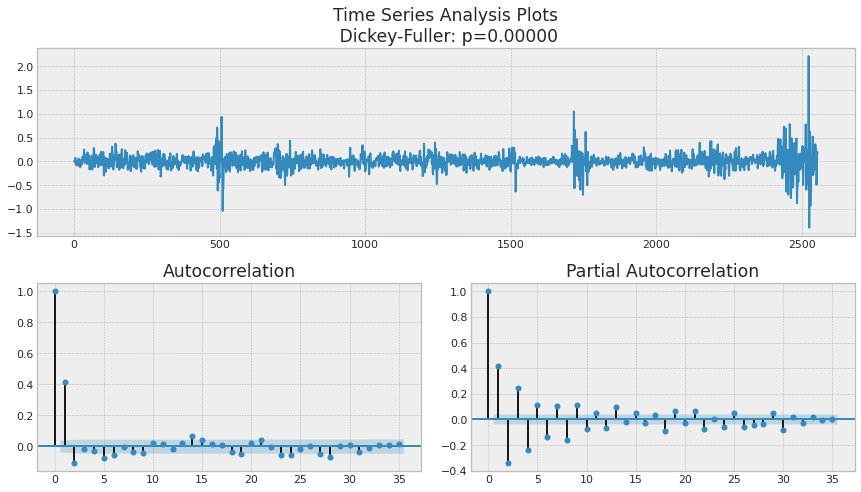

In [ ]:
close_data_diff = (close_data - close_data.shift(2)).dropna()
tsplot(close_data_diff)

# ARIMA

In [ ]:
test_len = int(len(close_data) * 0.2)
close_train, close_test = close_data.iloc[:-test_len], close_data.iloc[-test_len:]

In [ ]:

from sktime.forecasting.arima import AutoARIMA
#arima(9,2,0)
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
close_train.index = close_train.index.astype(int)
forecaster.fit(close_train)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2044
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1968.213
Date:                Wed, 23 Mar 2022   AIC                          -3932.427
Time:                        05:48:00   BIC                          -3921.182
Sample:                             0   HQIC                         -3928.302
                               - 2044                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0513      0.009     -5.488      0.000      -0.070      -0.033
sigma2         0.0085      0.000     79.295      0.000       0.008       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9264.91
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

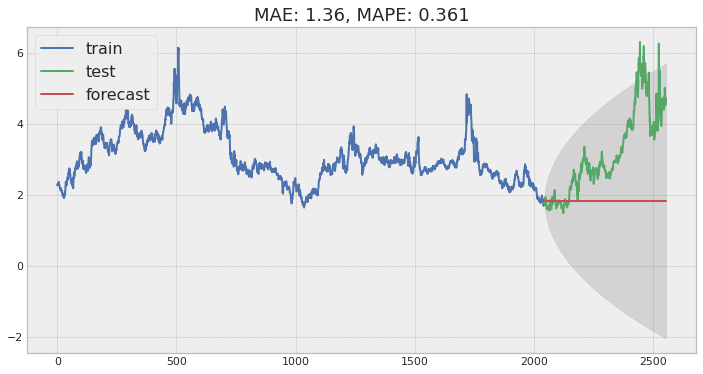

In [ ]:



def plot_forecast(series_train, series_test, forecast, forecast_int=None):

    mae = mean_absolute_error(series_test, forecast)
    mape = mean_absolute_percentage_error(series_test, forecast)

    plt.figure(figsize=(12, 6))
    plt.title(f"MAE: {mae:.2f}, MAPE: {mape:.3f}", size=18)
    series_train.plot(label="train", color="b")
    series_test.plot(label="test", color="g")
    forecast.index = series_test.index
    forecast.plot(label="forecast", color="r")
    if forecast_int is not None:
        plt.fill_between(
            series_test.index,
            forecast_int["lower"],
            forecast_int["upper"],
            alpha=0.2,
            color="dimgray",
        )
    plt.legend(prop={"size": 16})
    plt.show()

    return mae, mape

fh = np.arange(test_len) + 1
forecast, forecast_int = forecaster.predict(fh=fh, return_pred_int=True, alpha=0.05)
close_arima_mae, close_arima_mape = plot_forecast(
    close_train, close_test, forecast, forecast_int
)

## arima v2


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.345767
p-value: 0.157632


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df.value.diff()

0     NaN
1    -4.0
2     1.0
3     0.0
4    -1.0
     ... 
95    7.0
96    6.0
97   -2.0
98   -4.0
99   -2.0
Name: value, Length: 100, dtype: float64

In [ ]:
sections = data['Close'][:100]

In [ ]:
data['Close'].diff()

0         NaN
1       0.030
2      -0.015
3      -0.005
4       0.047
        ...  
2549   -0.183
2550   -0.306
2551   -0.001
2552    0.105
2553    0.094
Name: Close, Length: 2554, dtype: float64

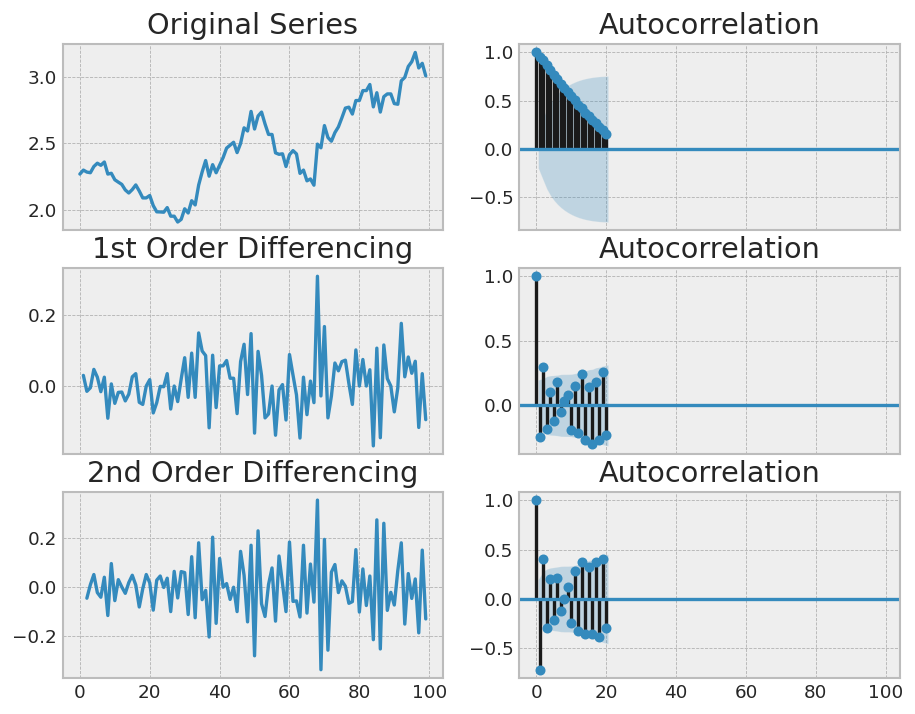

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(sections); axes[0, 0].set_title('Original Series')
# plot_acf(sections, ax=axes[0, 1])
smt.graphics.plot_acf(sections, lags=None, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(sections.diff()); axes[1, 0].set_title('1st Order Differencing')
smt.graphics.plot_acf(sections.diff().dropna(), lags=None, ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(sections.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
smt.graphics.plot_acf(sections.diff().diff().dropna(), lags=None, ax=axes[2, 1])


plt.show()

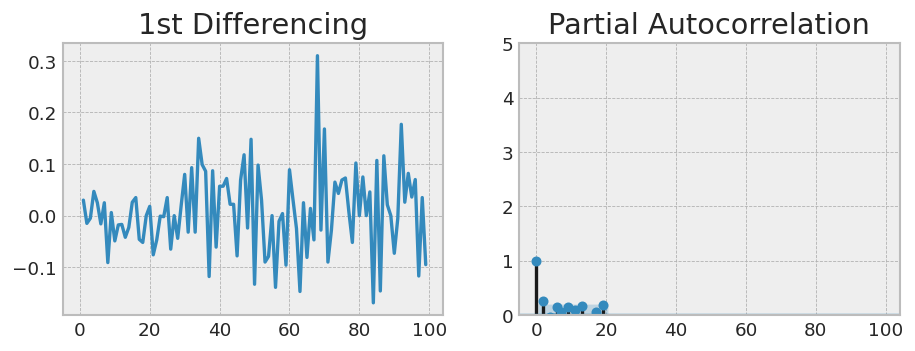

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sections.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(sections.diff().dropna(), ax=axes[1])

plt.show()

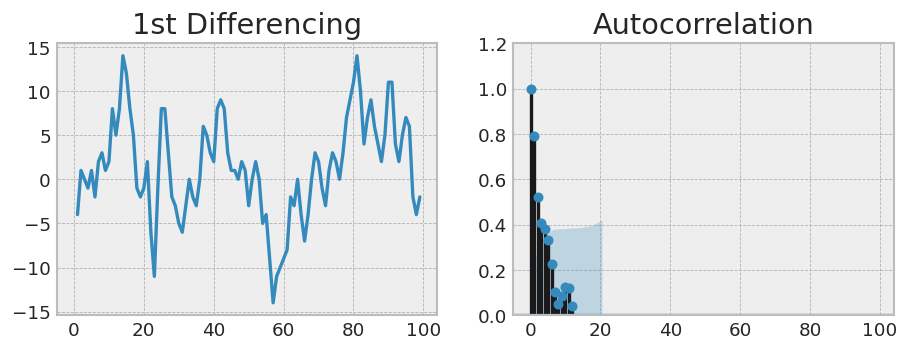

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:80]
test = df.value[80:]

In [ ]:
sections = data['Close'][:300]
train = sections[:240]
test = sections[240:]

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


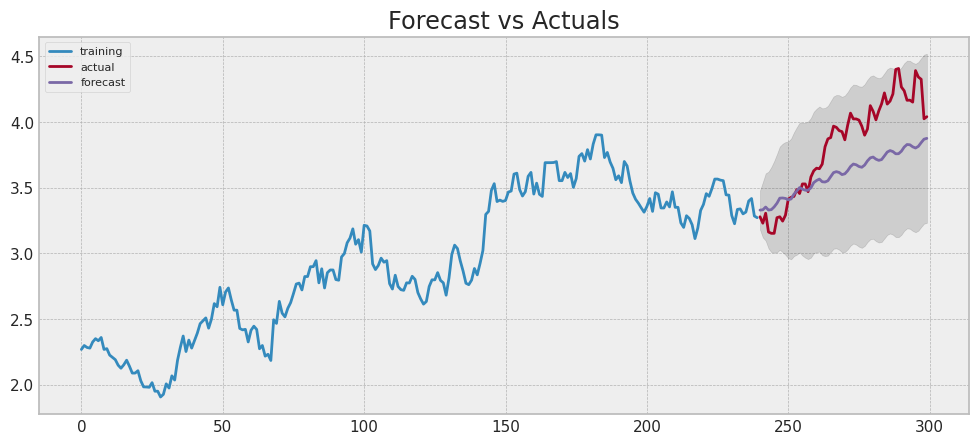

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(7, 1, 8))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(60, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
test

240    3.279
241    3.230
242    3.306
243    3.163
244    3.153
245    3.153
246    3.272
247    3.279
248    3.246
249    3.291
250    3.414
251    3.427
252    3.434
253    3.486
254    3.456
255    3.529
256    3.529
257    3.470
258    3.582
259    3.629
260    3.649
261    3.645
262    3.680
263    3.812
264    3.872
265    3.882
266    3.969
267    3.960
268    3.935
269    3.927
270    3.865
271    3.976
272    4.068
273    4.024
274    4.024
275    4.015
276    3.969
277    3.900
278    3.947
279    4.125
280    4.082
281    4.017
282    4.085
283    4.139
284    4.222
285    4.137
286    4.160
287    4.214
288    4.401
289    4.408
290    4.267
291    4.238
292    4.166
293    4.167
294    4.152
295    4.392
296    4.343
297    4.326
298    4.025
299    4.041
Name: Close, dtype: float64

In [ ]:
test.index

RangeIndex(start=240, stop=300, step=1)

# GARCH

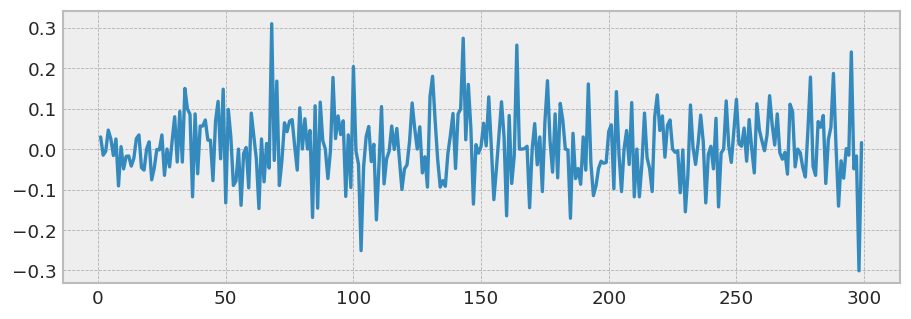

In [ ]:
plt.plot(sections.diff())

In [ ]:
train = sections[:240]
test = sections[240:]

In [ ]:
type(sections)

pandas.core.series.Series

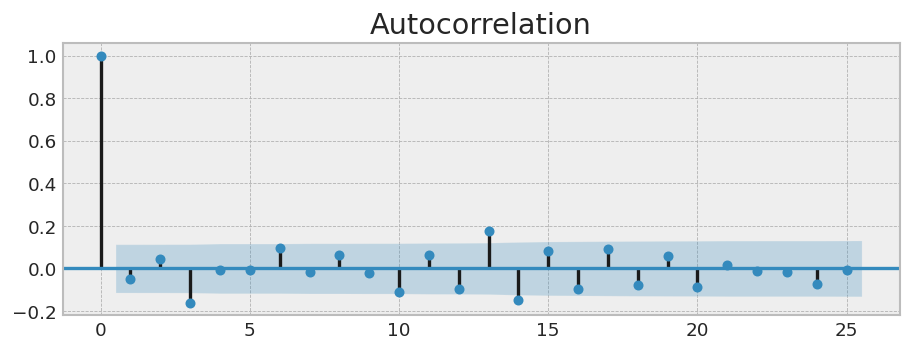

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sections.diff().dropna())
plt.show()

In [ ]:
!pip install arch

     |████████████████████████████████| 902 kB 4.3 MB/s 


In [ ]:
from arch import arch_model
model = arch_model(train, mean='Zero', vol='GARCH', p=13, q=13)

In [ ]:
model_fit = model.fit()
model_fit.conditional_volatility

Iteration:      1,   Func. Count:     29,   Neg. LLF: 597.6836667325431
Iteration:      2,   Func. Count:     60,   Neg. LLF: 597.4188720263774
Iteration:      3,   Func. Count:     89,   Neg. LLF: 595.9643110685896
Iteration:      4,   Func. Count:    118,   Neg. LLF: 595.8941025499198
Iteration:      5,   Func. Count:    148,   Neg. LLF: 595.8853153704766
Iteration:      6,   Func. Count:    177,   Neg. LLF: 595.859831740315
Iteration:      7,   Func. Count:    206,   Neg. LLF: 595.8438710479392
Iteration:      8,   Func. Count:    235,   Neg. LLF: 595.8395186271202
Iteration:      9,   Func. Count:    264,   Neg. LLF: 595.8387755837565
Iteration:     10,   Func. Count:    293,   Neg. LLF: 595.8367889290471
Iteration:     11,   Func. Count:    322,   Neg. LLF: 595.8365125551676
Iteration:     12,   Func. Count:    351,   Neg. LLF: 595.836432498362
Iteration:     13,   Func. Count:    380,   Neg. LLF: 595.8364064830862
Iteration:     14,   Func. Count:    409,   Neg. LLF: 595.83632410

0      2.247640
1      2.279236
2      2.308629
3      2.296769
4      2.291312
         ...   
235    3.308347
236    3.316133
237    3.392840
238    3.417055
239    3.296782
Name: cond_vol, Length: 240, dtype: float64

In [ ]:
fc.residual_variance.values[-1, :]

AttributeError: ignored

In [ ]:
fc.variance.values[-1, :]

AttributeError: ignored

Iteration:      1,   Func. Count:     29,   Neg. LLF: 597.6836667325431
Iteration:      2,   Func. Count:     60,   Neg. LLF: 597.4188720263774
Iteration:      3,   Func. Count:     89,   Neg. LLF: 595.9643110685896
Iteration:      4,   Func. Count:    118,   Neg. LLF: 595.8941025499198
Iteration:      5,   Func. Count:    148,   Neg. LLF: 595.8853153704766
Iteration:      6,   Func. Count:    177,   Neg. LLF: 595.859831740315
Iteration:      7,   Func. Count:    206,   Neg. LLF: 595.8438710479392
Iteration:      8,   Func. Count:    235,   Neg. LLF: 595.8395186271202
Iteration:      9,   Func. Count:    264,   Neg. LLF: 595.8387755837565
Iteration:     10,   Func. Count:    293,   Neg. LLF: 595.8367889290471
Iteration:     11,   Func. Count:    322,   Neg. LLF: 595.8365125551676
Iteration:     12,   Func. Count:    351,   Neg. LLF: 595.836432498362
Iteration:     13,   Func. Count:    380,   Neg. LLF: 595.8364064830862
Iteration:     14,   Func. Count:    409,   Neg. LLF: 595.83632410

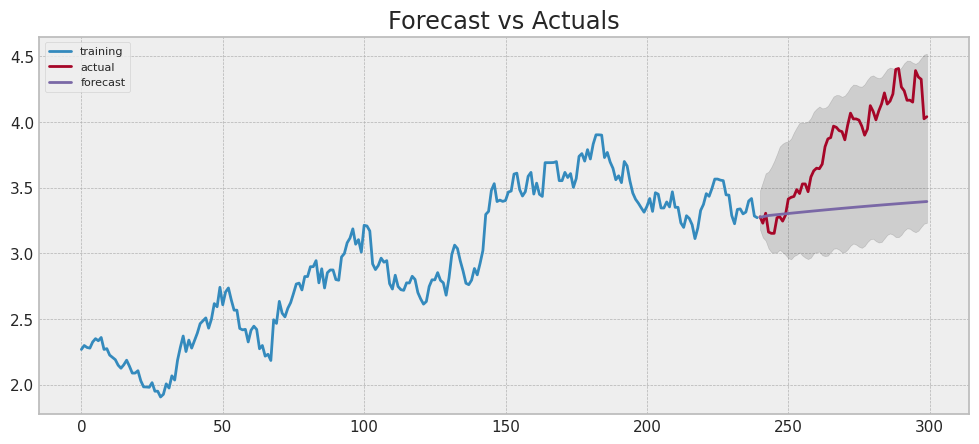

In [ ]:
import math
model_fit = model.fit()
# forecast the test set
n_test = 60
# yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
# var = [i*0.01 for i in range(0,100)]
# yhat_new = [math.sqrt(x) for x in yhat.variance.values[-1, :]]
# plt.plot(test)
# # plot forecast variance
# plt.plot(yhat_new)
# plt.show()

fc = model_fit.forecast(horizon = 60)  # 95% conf
yhat_new = [math.sqrt(x) for x in fc.variance.values[-1, :]]
# Make as pandas series
fc_series = pd.Series(yhat_new, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
import math
print([math.sqrt(x) for x in yhat.variance.values[-1, :]])

NameError: ignored

## Garch 21

In [ ]:
def garch_model(df, p=1, o=0, q=1, mean='constant', vol = 'GARCH', 
                dist='normal'):
    model = arch_model(
        df, 
        p = p, o=o, q = q, 
        mean = mean,
        vol = vol,
        dist = dist
    )
    return model

In [ ]:
def returns_vol(df, column):
    # Calculate returns as percentage of price changes
    df['Returns'] = df[column].pct_change()*100
    # Calculate daily std of returns
    volatility = df['Returns'].std()
    df.dropna(inplace=True)
    return df, volatility

df, volatility = returns_vol(data, column='Close')

In [ ]:
def train_test_split(X, size=0.7):
    train = X[:int(X.shape[0]*size)]
    test = X[int(X.shape[0]*size):]
    return train, test

train, test = train_test_split(X=data['Close'], size=0.7)
print(f'Train: {len(train)}, Test: {len(test)}')

Train: 1787, Test: 766


In [ ]:
# Implement a basic GARCH model
basic_gm = garch_model(data['Returns']) 
# Fit the model
gm_result = basic_gm.fit(disp='off', show_warning=False)

# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6284.56
Distribution:                  Normal   AIC:                           12577.1
Method:            Maximum Likelihood   BIC:                           12600.5
                                        No. Observations:                 2553
Date:                Wed, Mar 23 2022   Df Residuals:                     2552
Time:                        05:51:12   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0858  4.852e-02      1.768  7.699e-02 [-9.29

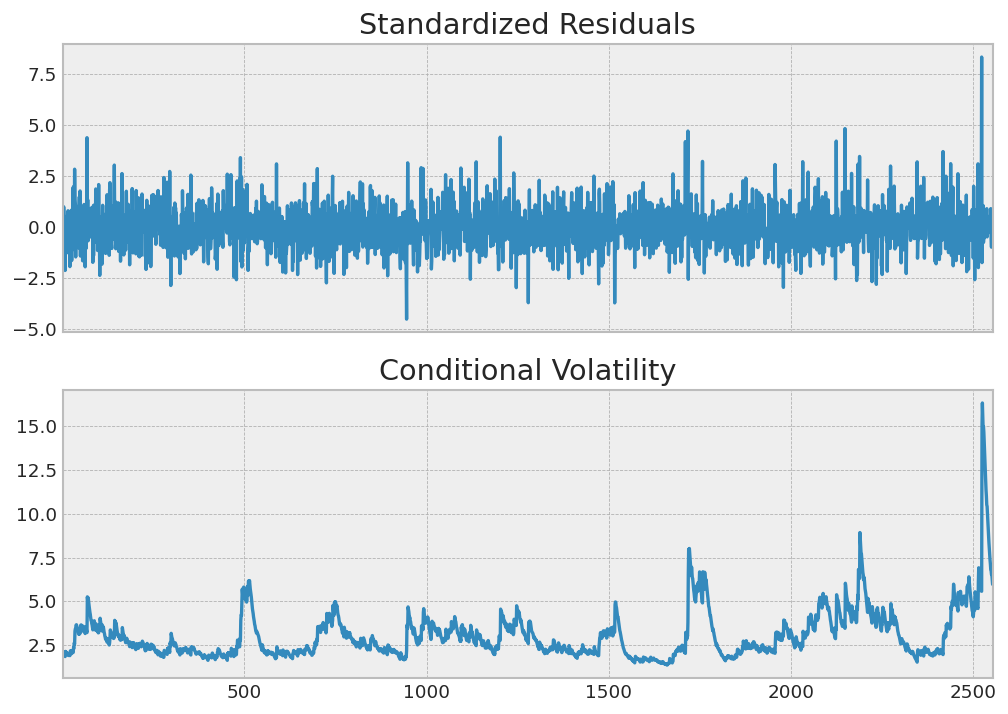

In [ ]:
plt.rc("figure", figsize=(10, 7))
gm_result.plot()
plt.show()

In [ ]:
gm_resid = gm_result.resid
# Predicted price volatility (std)
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

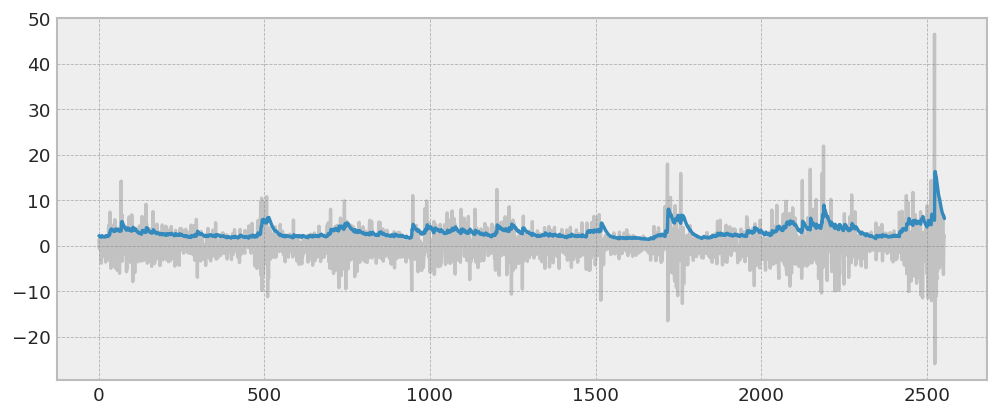

In [ ]:
plt.rc("figure", figsize=(10, 4))
gm_vol = gm_result.conditional_volatility
plt.plot(data['Returns'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.plot(gm_vol, label = 'GARCH Volatility')

In [ ]:
index = data.index
end_loc = 577
forecasts = {}
for i in range(50):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(last_obs = i + end_loc,
                             disp='off', show_warning=False)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T

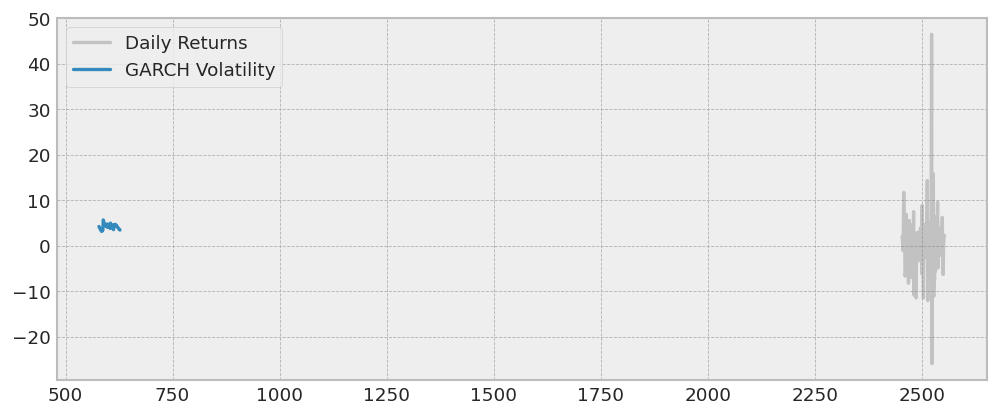

In [ ]:
plt.plot(data.Returns[-100:], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.plot(forecast_var, label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()

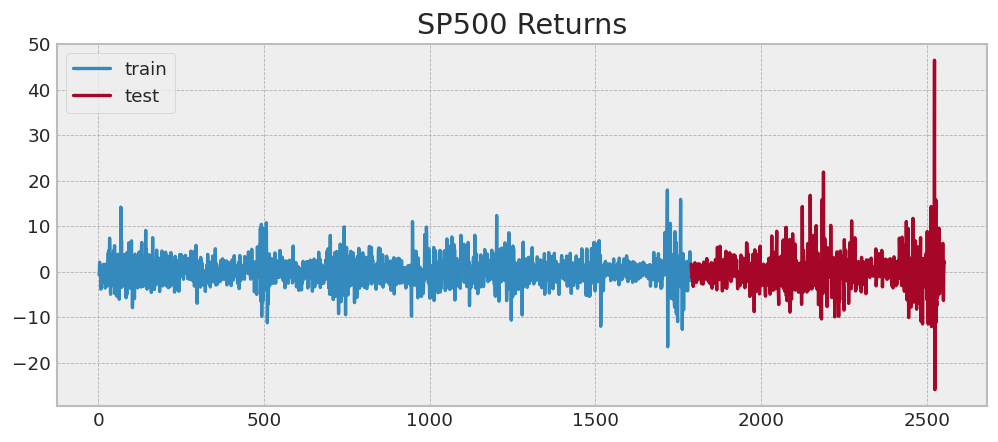

In [ ]:
test = pd.DataFrame(test)
train = pd.DataFrame(train)
train, _ = returns_vol(train, column='Close')
test, _ = returns_vol(test, column='Close')

# Plot train & test returns
fig, ax = plt.subplots(figsize=(10,4))
train['Returns'].plot(ax=ax, label='train')
test['Returns'].plot(ax=ax, label='test')
plt.title('SP500 Returns')
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
rolling_predictions = []
for i in range(test.shape[0]):
    model = garch_model(train['Returns'], p=1, o=1, q=1)
    model_fit = model.fit(update_freq=1, disp='off')
    pred = model_fit.forecast(horizon=1)
    train = train.append(test.iloc[i])
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

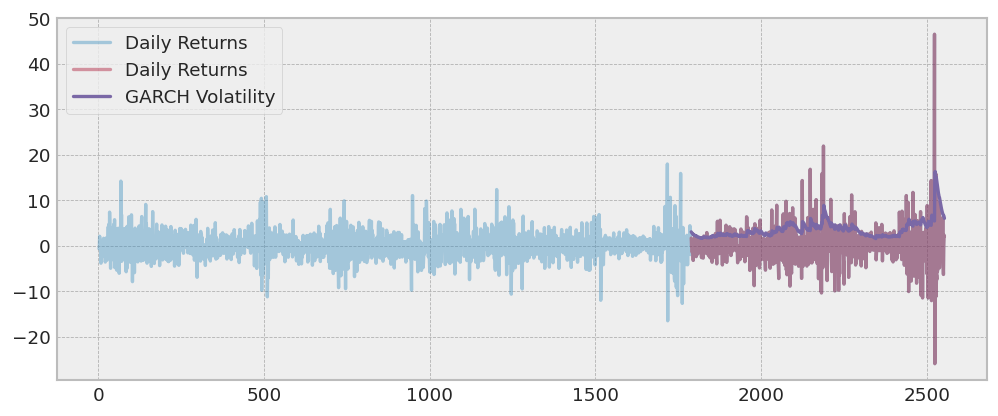

In [ ]:
rolling_predictions = pd.DataFrame(rolling_predictions, index=test.index)
plt.plot(train['Returns'], 
         label = 'Daily Returns', alpha = 0.4)
plt.plot(test['Returns'], 
         label = 'Daily Returns', alpha = 0.4)
plt.plot(rolling_predictions, 
         label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()

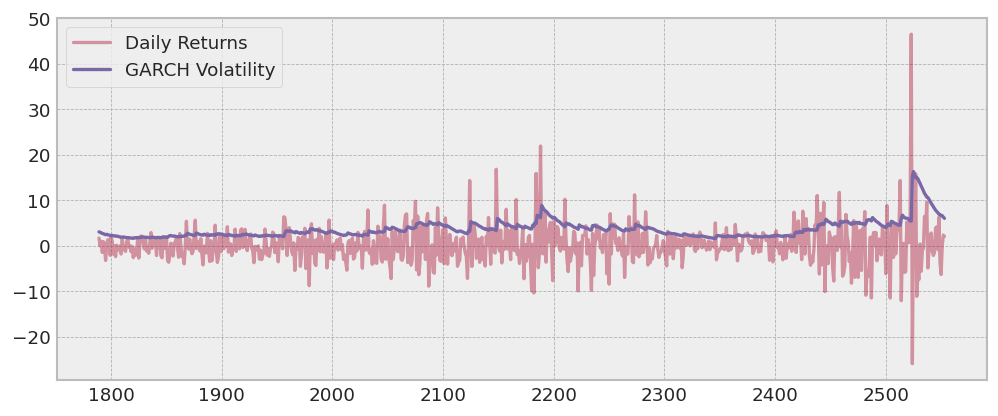

In [ ]:
plt.plot(test['Returns'], color = 'C1', 
         label = 'Daily Returns', alpha = 0.4)
plt.plot(rolling_predictions, color = 'C2',
         label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
df['Returns'] = df[column].pct_change()*100
# Calculate daily std of returns
volatility = df['Returns'].std()

NameError: ignored

## pct change to actual

In [ ]:
len(rolling_predictions)

In [ ]:
data['Close'][len(data)-765]

In [ ]:
data['Close'][1789]

In [ ]:
df['Returns'][1789]

In [ ]:
rolling_predictions.values[0]

In [ ]:
new_list = list()
last = 2.859
new_list.append(last*(rolling_predictions.values[0]/100) + last)
for i in range(1, len(rolling_predictions)):
  pct = rolling_predictions.values[i]
  x1 = new_list[i-1]
  x2 =  x1*(pct/100) + x1 
  new_list.append(x2)

In [ ]:
new_list

In [ ]:
plt.plot(new_list)

In [ ]:
pct = 1.6714082503556327
x1 = 2.812

x2 =  x1*(pct/100) + x1 
x2

In [ ]:
df['Close'][2400]

In [ ]:
df['Close'][2399]

In [ ]:
df['Returns'][2400]

In [ ]:
df['Returns'][2399]

In [ ]:
(data['Close'].pct_change()*100).std()

# Exponential smooth

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
#First Instance
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

ValueError: ignored

## testing

In [ ]:
data.columns.values.tolist()

In [ ]:
data  = data.shift(1)
data.loc[0] = data.columns.values.tolist()

In [ ]:
data.head()

In [ ]:
data.values.tolist()

# Testing for EMS v2


In [ ]:
train11, test11 = train_test_split(X=df['Close'], size=0.7)

In [ ]:
from statsmodels.tsa.holtwinters import Holt

In [ ]:
fit1 = Holt(train11).fit(smoothing_level=0.4,optimized='False')
yhat= fit1.predict(start=1788,end=2553)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


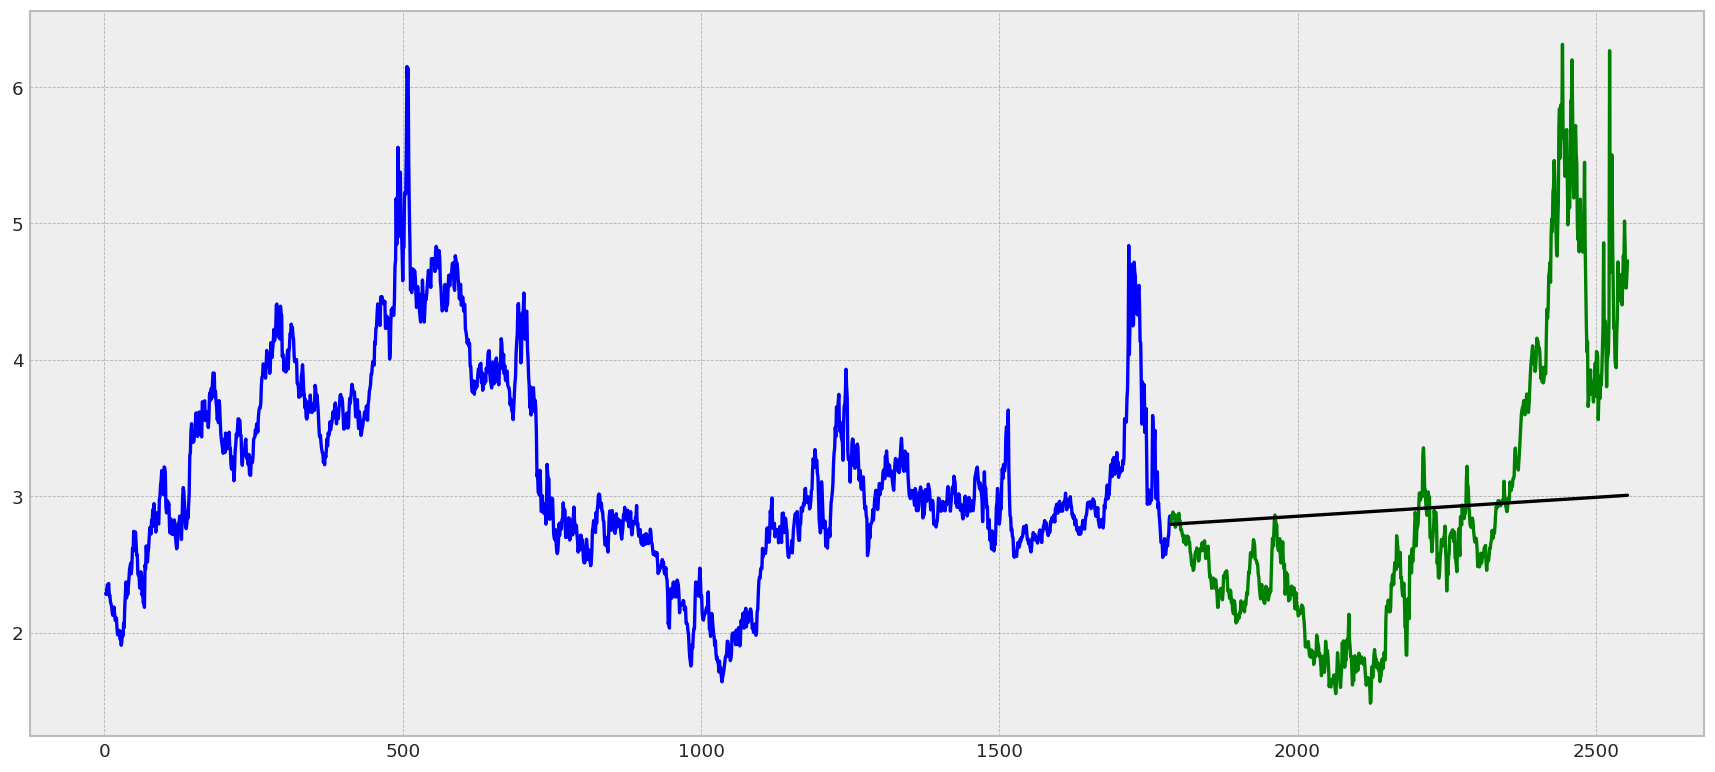

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(train11,color='blue')
plt.plot(test11, color='green')
plt.plot(yhat, color='black')

# Final Models

## ARIMA

In [ ]:
df = data

In [ ]:
# Searching over SARIMA model orders
class Auto_Arima():
    def __init__(self, df, start_p=1, start_q=1, max_p=10, max_q=10,\
        seasonal=False, information_criterion='aic'):
        self.df = df
        self.start_p = start_p
        self.start_q = start_q
        self.max_p = max_p
        self.max_q = max_q
        self.seasonal = seasonal
        self.information_criterion = information_criterion

    def arima_results(self):
        results = pm.auto_arima(
            self.df,
            start_p = self.start_p,
            start_q = self.start_q,
            max_p = self.max_p,
            max_q = self.max_q,
            seasonal = self.seasonal,
            # m = 14,
            # D = 1,
            # start_P = 1,
            # start_Q = 1,
            # max_P = 10,
            # max_Q = 10,
            information_criterion = self.information_criterion,
            trace = False,
            error_action = 'ignore',
            suppress_warnings=True,
            stepwise = True,
            scoring = 'mse'
        )
        return results

In [ ]:
def train_test_split(X, size=0.7):
    train = X[:int(X.shape[0]*size)]
    test = X[int(X.shape[0]*size):]
    return train, test

train, test = train_test_split(X=df['Close'], size=0.7)
print(f'Train: {len(train)}, Test: {len(test)}')

Train: 1785, Test: 765


In [ ]:
arima_model = Auto_Arima(train)
results = arima_model.arima_results()


In [ ]:
def plot_train_test(train, test, df):
    # Plot the predictions for validation set
    plt.figure(figsize=(10,4))
    plt.plot(train, label='train')
    plt.plot(test, label='test')
    plt.plot(df, label='predicted')
    plt.legend()
    plt.show()

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, df))
    print(f'RMSE: {rmse:.2f}')

In [ ]:
def one_step_forecast():
    predicted, conf_int = results.predict(n_periods=1, return_conf_int=True)
    return (
        predicted.tolist()[0],
        np.asarray(conf_int).tolist()[0])

predictions = []
confidence_intervals = []

for x in test:
    predicted, conf = one_step_forecast()
    predictions.append(predicted)
    confidence_intervals.append(conf)

    # Updates the existing model
    results.update(x)


In [ ]:
import joblib
joblib.dump(results,'/content/drive/MyDrive/SIH- Hack Inversion/Coding/Models/arima.pkl')

['/content/drive/MyDrive/SIH- Hack Inversion/Coding/Models/arima.pkl']

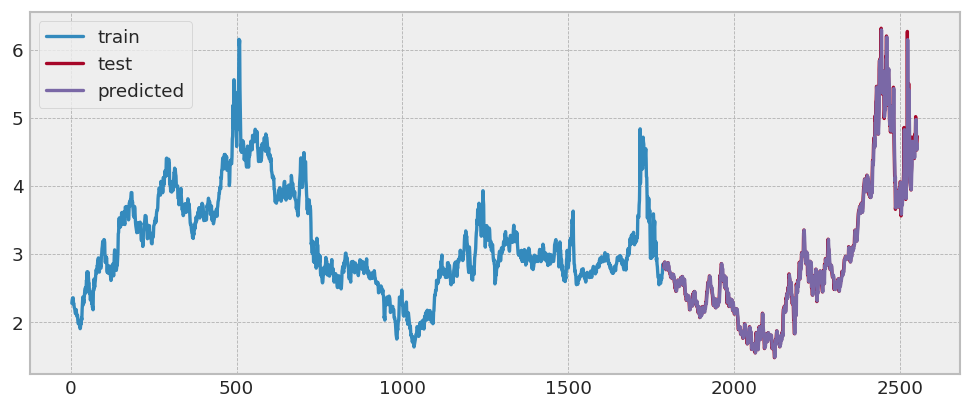

RMSE: 0.16


In [ ]:
predicted = pd.DataFrame(predictions, index=test.index, columns=['predicted'])

# Plot real price vs one-step-forecast
plot_train_test(train, test, predicted)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

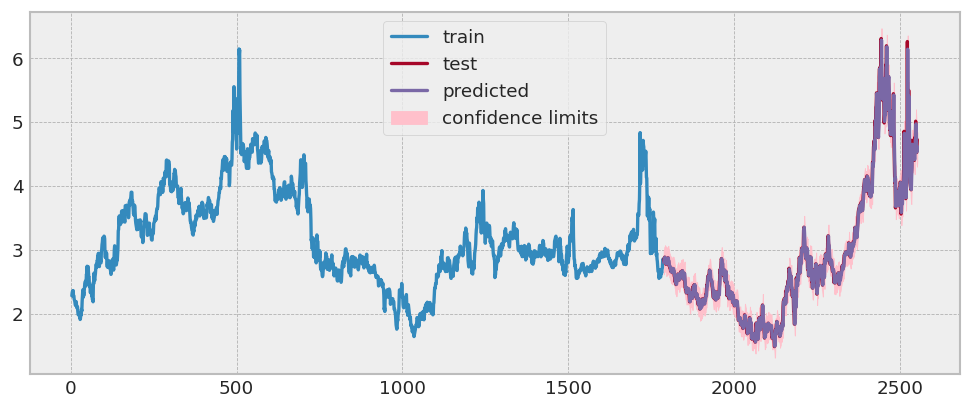

In [ ]:
lower_limits = [row[0] for row in confidence_intervals]
upper_limits = [row[1] for row in confidence_intervals]
# Plot predictions with conf_int
plt.figure(figsize=(10,4))
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(predicted, label='predicted')
plt.fill_between(test.index, lower_limits,
		 upper_limits, color='pink', label='confidence limits')
plt.legend()
plt.show()

## GARCH

In [ ]:
def returns_vol(df, column):
    # Calculate returns as percentage of price changes
    df['Returns'] = df[column].pct_change()*100
    # Calculate daily std of returns
    volatility = df['Returns'].std()
    df.dropna(inplace=True)
    return df, volatility

df, volatility = returns_vol(df, column='Close')

In [ ]:
def garch_model(df, p=1, o=0, q=1, mean='constant', vol = 'GARCH', 
                dist='normal'):
    model = arch_model(
        df, 
        p = p, o=o, q = q, 
        mean = mean,
        vol = vol,
        dist = dist
    )
    return model

In [ ]:
# Implement a basic GARCH model
basic_gm = garch_model(df['Returns']) 
# Fit the model
gm_result = basic_gm.fit(disp='off', show_warning=False)

# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6279.52
Distribution:                  Normal   AIC:                           12567.0
Method:            Maximum Likelihood   BIC:                           12590.4
                                        No. Observations:                 2550
Date:                Wed, Mar 23 2022   Df Residuals:                     2549
Time:                        07:50:42   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0866  4.858e-02      1.782  7.470e-02 [-8.62

In [ ]:
# Obtain model estimated residuals and volatility
# Residual = predicted price - real price
gm_resid = gm_result.resid
# Predicted price volatility (std)
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

In [ ]:
index = df.index
end_loc = 577
forecasts = {}
for i in range(50):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(last_obs = i + end_loc,
                             disp='off', show_warning=False)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T

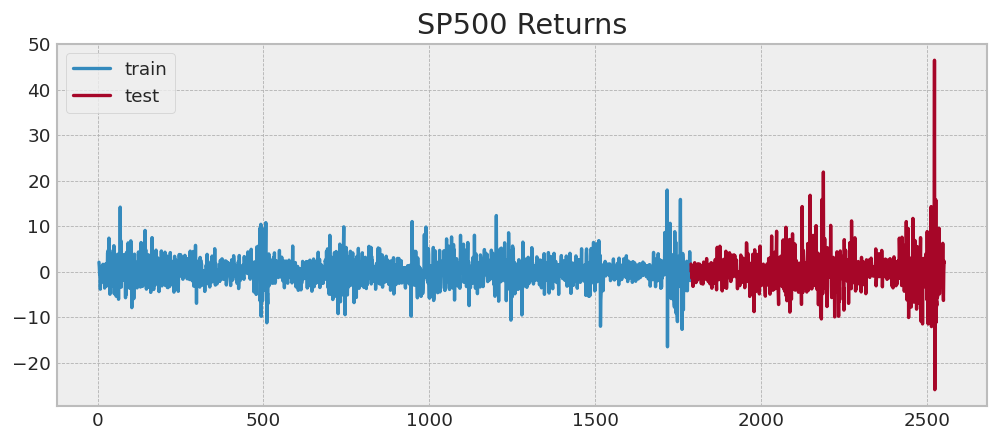

In [ ]:
test = pd.DataFrame(test)
train = pd.DataFrame(train)
train, _ = returns_vol(train, column='Close')
test, _ = returns_vol(test, column='Close')

# Plot train & test returns
fig, ax = plt.subplots(figsize=(10,4))
train['Returns'].plot(ax=ax, label='train')
test['Returns'].plot(ax=ax, label='test')
plt.title('SP500 Returns')
ax.legend(loc = 'upper left')
plt.show()

In [ ]:
rolling_predictions = []
for i in range(test.shape[0]):
    model = garch_model(train['Returns'], p=1, o=1, q=1)
    model_fit = model.fit(update_freq=1, disp='off')
    pred = model_fit.forecast(horizon=1)
    train = train.append(test.iloc[i])
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
joblib.dump(model_fit,'/content/drive/MyDrive/SIH- Hack Inversion/Coding/Models/garch.pkl')

['/content/drive/MyDrive/SIH- Hack Inversion/Coding/Models/garch.pkl']

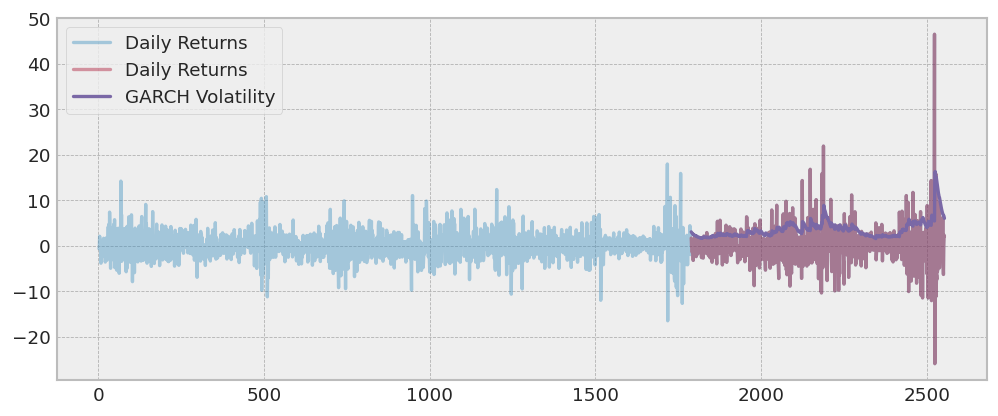

In [ ]:
rolling_predictions = pd.DataFrame(rolling_predictions, index=test.index)
plt.plot(train['Returns'], 
         label = 'Daily Returns', alpha = 0.4)
plt.plot(test['Returns'], 
         label = 'Daily Returns', alpha = 0.4)
plt.plot(rolling_predictions, 
         label = 'GARCH Volatility')
plt.legend(loc = 'upper left')
plt.show()

## Exponential Smoothening

In [ ]:
train1, test1 = train_test_split(X=df['Close'], size=0.7)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


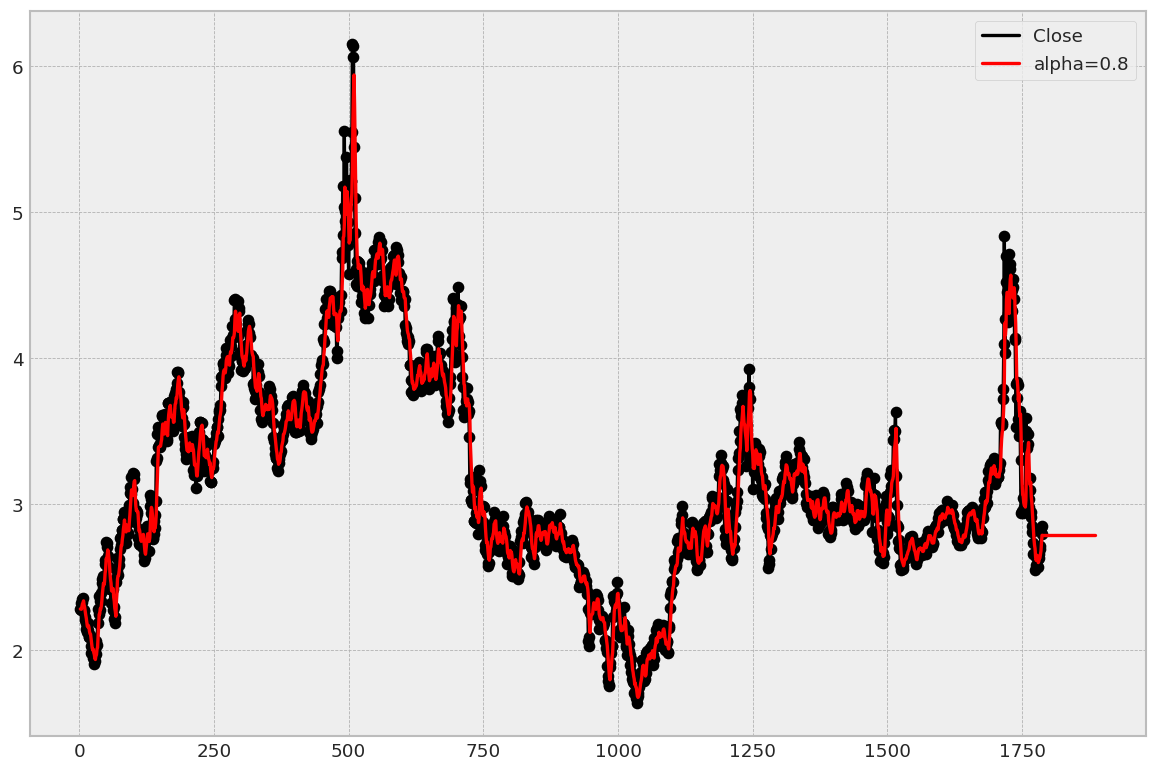

In [ ]:
#First Instance
# ins1 = SimpleExpSmoothing(train1).fit(smoothing_level=0.2,optimized=False)
# ins_cast1 = ins1.forecast(100).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train1).fit(smoothing_level=0.4,optimized=False)
ins_cast2 = ins2.forecast(100).rename('alpha=0.8')

#Third Instance
# ins3 = SimpleExpSmoothing(train1).fit()
# ins_cast3 = ins3.forecast(100).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = train1.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
# ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
# ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

# #Plot for alpha = 0.8
# ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
# ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

ins_cast2.plot(ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
# ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
# ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

In [ ]:
model_fit = SimpleExpSmoothing(train1).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
ins2.fittedvalues.values[-10:]

array([2.67636265, 2.59527253, 2.57745451, 2.6154909 , 2.65269818,
       2.63933964, 2.68546793, 2.71069359, 2.81093872, 2.84618774])

In [ ]:
test1

1788    2.812
1789    2.859
1790    2.857
1791    2.884
1792    2.841
        ...  
2549    4.833
2550    4.527
2551    4.526
2552    4.631
2553    4.725
Name: Close, Length: 766, dtype: float64

In [ ]:
test1.iloc[12:22].index

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809], dtype='int64')

In [ ]:
train1, test1 = train_test_split(X=df['Close'], size=0.7)

In [ ]:
import joblib

In [ ]:
rolling_predictions = pd.Series()
for i in range(1788,2554, 5):
    model_fit = SimpleExpSmoothing(train1).fit(smoothing_level=0.8,optimized=False)
    ins_cast2 = ins2.forecast(5)
    train1 = train1.append(pd.Series(ins2.fittedvalues[-5:]))
    print(ins2.fittedvalues[-5:])
    rolling_predictions = pd.concat([rolling_predictions, pd.Series(ins2.fittedvalues[-5:])], ignore_index=True)
joblib.dump(model_fit, '/content/drive/MyDrive/SIH- Hack Inversion/Coding/Models/ems.pkl')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available.

1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available.

1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available.

1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available.

['/content/drive/MyDrive/SIH- Hack Inversion/Coding/Models/ems.pkl']

In [ ]:
pd.Series(ins2.fittedvalues[-10:])

1778    2.651319
1779    2.620791
1780    2.601675
1781    2.611005
1782    2.631403
1783    2.633242
1784    2.658745
1785    2.682047
1786    2.743628
1787    2.788177
dtype: float64

In [ ]:
len(train1)

2556

In [ ]:
rolling_predictions.index+=1788

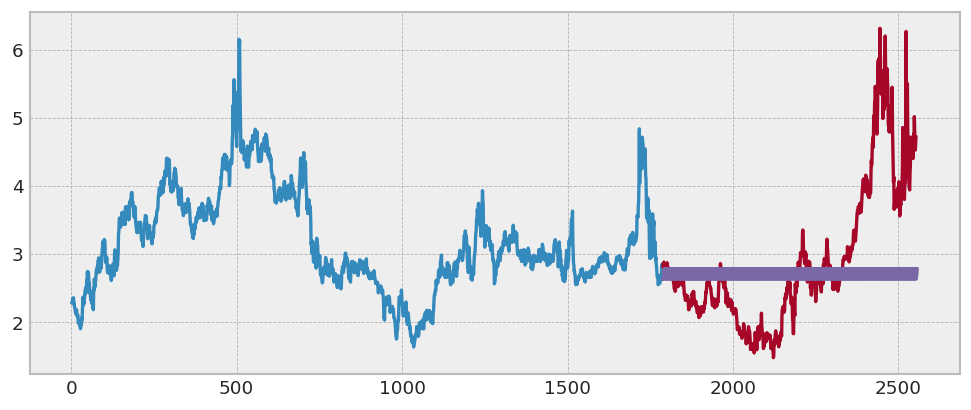

In [ ]:
# ax = train1.plot(marker='o', color='black', figsize=(12,8), legend=True)
plt.plot(train1)
plt.plot(test1)
plt.plot(rolling_predictions)

In [ ]:
rolling_predictions.to

0      2.676363
1      2.595273
2      2.577455
3      2.615491
4      2.652698
         ...   
765    2.639340
766    2.685468
767    2.710694
768    2.810939
769    2.846188
Length: 770, dtype: float64

In [ ]:
sty = ''

len(sty)

0